In [202]:
#### ASSIGNMENT 03 - AIDI2000 ####

# Import necessary libraries
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [203]:
# Load the dataset
data = pd.read_csv('dataset/synthetic_ecommerce_returns.csv')

In [204]:
# Configure pandas to display float numbers with 4 decimal places
pd.set_option('display.float_format', '{:.4f}'.format)

In [205]:
# Display the first few rows of the dataset
print(data.head())

                            Customer_ID  Purchase_Amount Product_Category  \
0  3b31f776-d71a-420d-8d53-d07071a71629          46.9300             Home   
1  e5394a40-6f2a-476a-8553-ef8b427dcd39         301.0100             Home   
2  97c087b3-3b52-4071-a55e-2d7837d57622         131.6700           Beauty   
3  faa8270e-6877-4cf0-a94c-f0577f075324          91.2900             Home   
4  fd979212-8749-4b3c-b911-76524e04fae2          16.9600           Sports   

  Shipping_Method  Delivery_Time_Days  Customer_Review_Score Product_Size  \
0         Express                   4                 4.6000        Small   
1        Standard                   5                 2.6000       Medium   
2       Overnight                   7                 3.7000        Small   
3         Express                   6                 3.8000       Medium   
4         Express                   4                 5.0000        Large   

   Discount_Applied  Order_Date  Return_Status  
0                 0  2024

In [206]:
# Check for missing/null values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values('Missing Values', ascending=False)

print("Missing values by feature:")
print(missing_data[missing_data['Missing Values'] > 0])

# If there are missing values, propose fixes
if missing_values.sum() > 0:
    print("\nProposed fixes for missing data:")
    for col in missing_data[missing_data['Missing Values'] > 0].index:
        if data[col].dtype in ['int64', 'float64']:
            print(f"- {col}: Replace with median or mean")
        else:
            print(f"- {col}: Replace with mode (most frequent value)")
else:
    print("\nNo missing values found in the dataset.")

Missing values by feature:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

No missing values found in the dataset.


In [207]:
# Check Basic Descriptive statistics
print(data.describe().T)

                          count    mean     std    min     25%     50%  \
Purchase_Amount       5000.0000 98.9759 98.7051 0.0000 27.9525 69.3200   
Delivery_Time_Days    5000.0000  5.0098  2.2127 0.0000  3.0000  5.0000   
Customer_Review_Score 5000.0000  3.9207  0.8681 1.0000  3.3000  4.0000   
Discount_Applied      5000.0000  0.3120  0.4634 0.0000  0.0000  0.0000   
Return_Status         5000.0000  0.1524  0.3594 0.0000  0.0000  0.0000   

                           75%      max  
Purchase_Amount       137.8725 817.2400  
Delivery_Time_Days      6.0000  16.0000  
Customer_Review_Score   4.7000   5.0000  
Discount_Applied        1.0000   1.0000  
Return_Status           0.0000   1.0000  


In [208]:
# Drop unnecessary/redundant columns
data = data.drop(columns=['Customer_ID'])

In [209]:
# Count of returned vs not returned items
return_counts = data['Return_Status'].value_counts()
print(return_counts)

Return_Status
0    4238
1     762
Name: count, dtype: int64


In [210]:
print(f"Return Rate: {return_counts[1] / len(data) * 100:.2f}%")

Return Rate: 15.24%


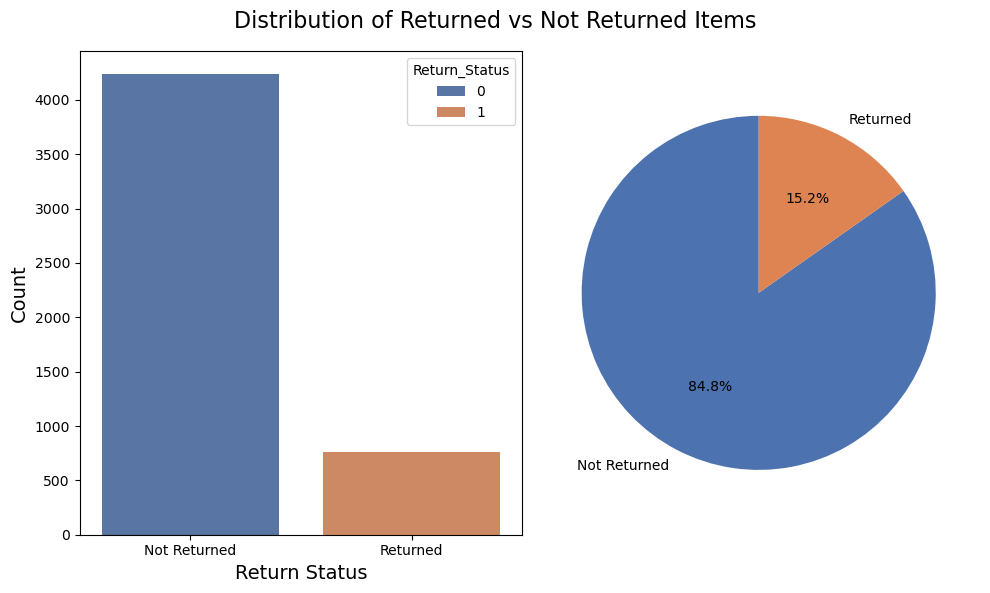

In [211]:
# EDA Visualization 01 - Distribution of Return Status
plt.figure(figsize=(10, 6))
plt.suptitle('Distribution of Returned vs Not Returned Items', fontsize=16)
colors = ['#4c72b0', '#dd8452']

plt.subplot(1, 2, 1)
sns.countplot(x='Return_Status', data=data, palette=colors, hue='Return_Status')
plt.xlabel('Return Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Not Returned', 'Returned'])

plt.subplot(1, 2, 2)
labels = ['Not Returned', 'Returned']
plt.pie(return_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

plt.tight_layout()
plt.show()

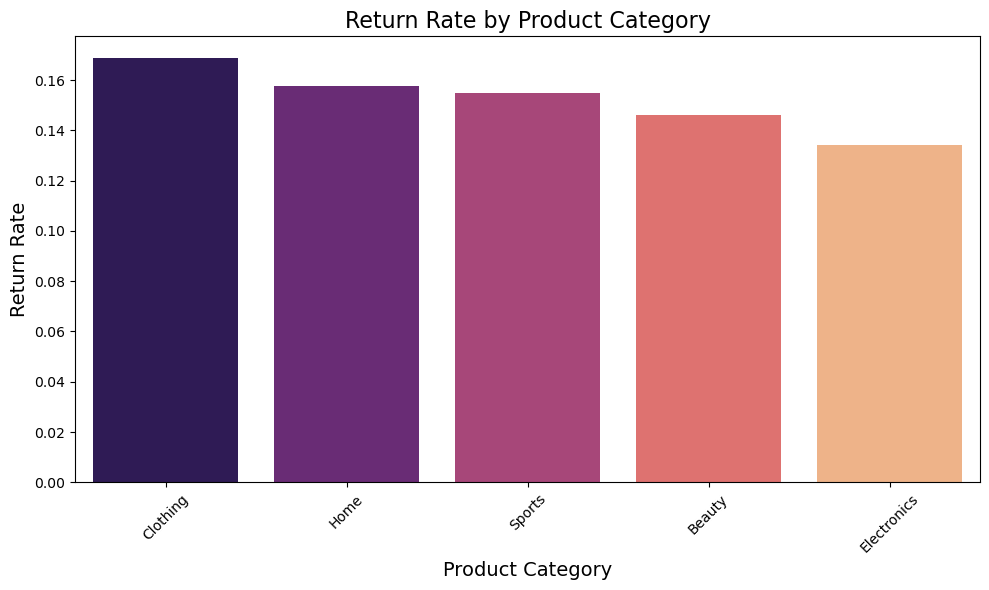

In [212]:
# EDA Visualization 02 - Return Rate by Product Category
category_return_rate = data.groupby('Product_Category')['Return_Status'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_return_rate.index, y=category_return_rate.values, palette='magma', hue=category_return_rate.index)
plt.title('Return Rate by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Return Rate', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


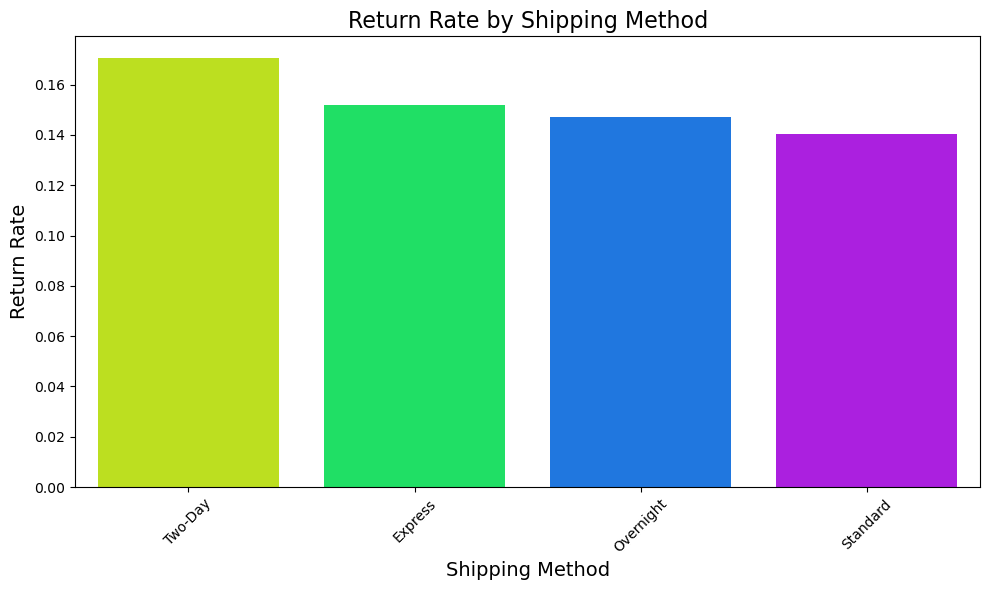

In [213]:
# EDA Visualization 03 - Return Rate by Shipping Method
shipping_return_rate = data.groupby('Shipping_Method')['Return_Status'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=shipping_return_rate.index, y=shipping_return_rate.values, palette='hsv', hue=shipping_return_rate.index)
plt.title('Return Rate by Shipping Method', fontsize=16)
plt.xlabel('Shipping Method', fontsize=14)
plt.ylabel('Return Rate', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

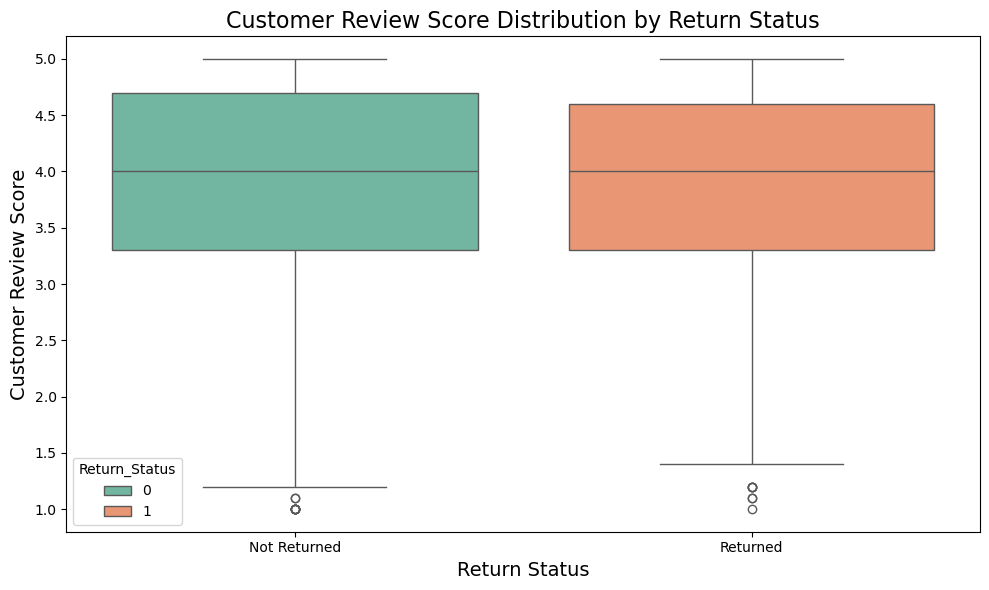

In [214]:
# EDA Visualization 04 - Return Rate by Shipping Method
plt.figure(figsize=(10, 6))
sns.boxplot(x='Return_Status', y='Customer_Review_Score', data=data, palette='Set2', hue='Return_Status')
plt.title('Customer Review Score Distribution by Return Status', fontsize=16)
plt.xlabel('Return Status', fontsize=14)
plt.ylabel('Customer Review Score', fontsize=14)
plt.xticks([0, 1], ['Not Returned', 'Returned'])
plt.tight_layout()
plt.show()

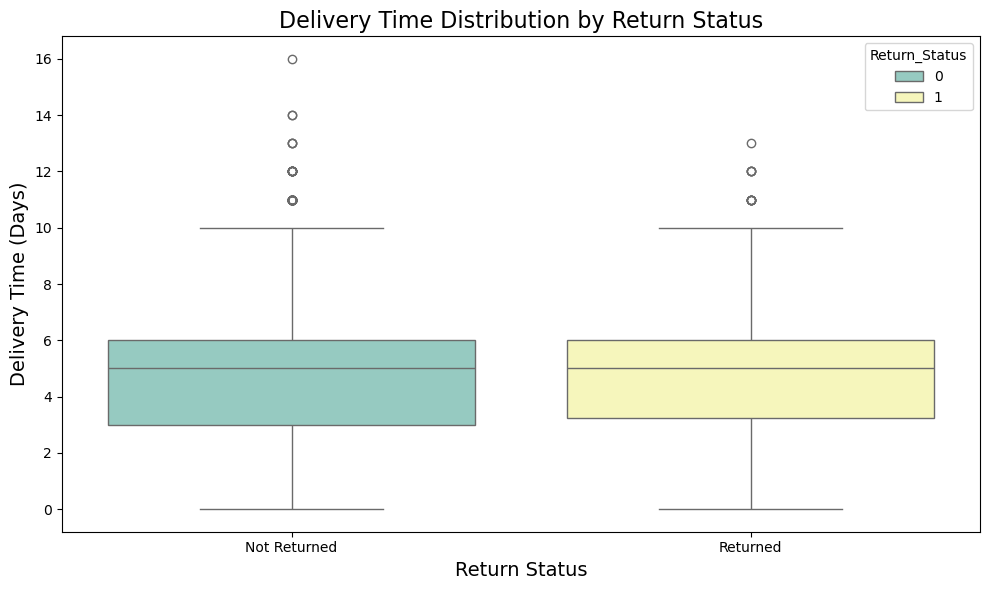

In [215]:
# EDA Visualization 05 - Return Rate by Delivery Time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Return_Status', y='Delivery_Time_Days', data=data, palette='Set3', hue='Return_Status')
plt.title('Delivery Time Distribution by Return Status', fontsize=16)
plt.xlabel('Return Status', fontsize=14)
plt.ylabel('Delivery Time (Days)', fontsize=14)
plt.xticks([0, 1], ['Not Returned', 'Returned'])
plt.tight_layout()
plt.show()

Discount_Applied
0   0.1538
1   0.1494
Name: Return_Status, dtype: float64


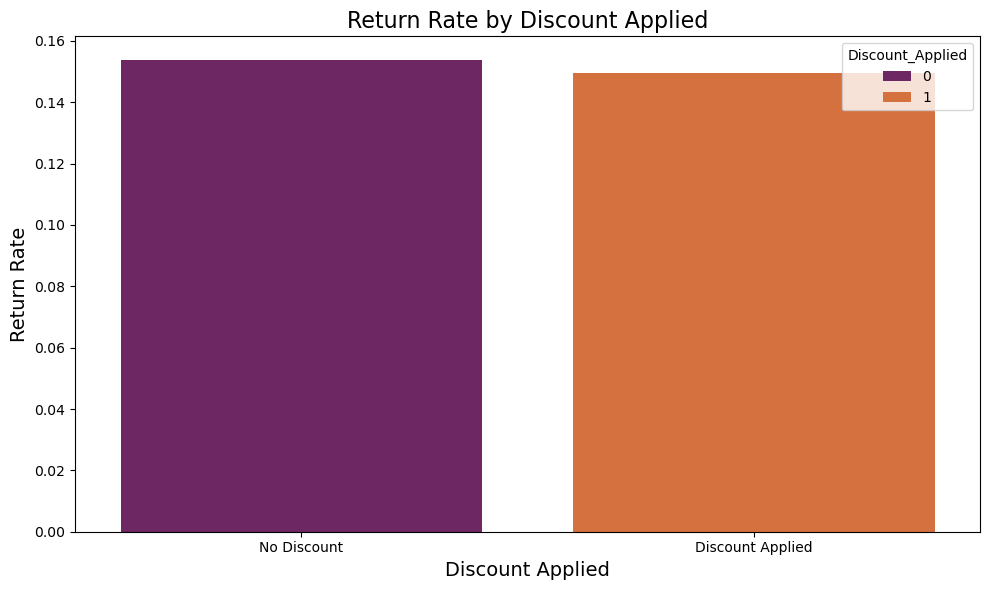

In [216]:
# EDA Visualization 06 - Return Rate by Delivery Time
discount_return_rate = data.groupby('Discount_Applied')['Return_Status'].mean()
print(discount_return_rate)
plt.figure(figsize=(10, 6))
sns.barplot(x=discount_return_rate.index, y=discount_return_rate.values, palette='inferno', hue=discount_return_rate.index)
plt.title('Return Rate by Discount Applied', fontsize=16)
plt.xlabel('Discount Applied', fontsize=14)
plt.ylabel('Return Rate', fontsize=14)
plt.xticks([0, 1], ['No Discount', 'Discount Applied'])
plt.tight_layout()
plt.show()

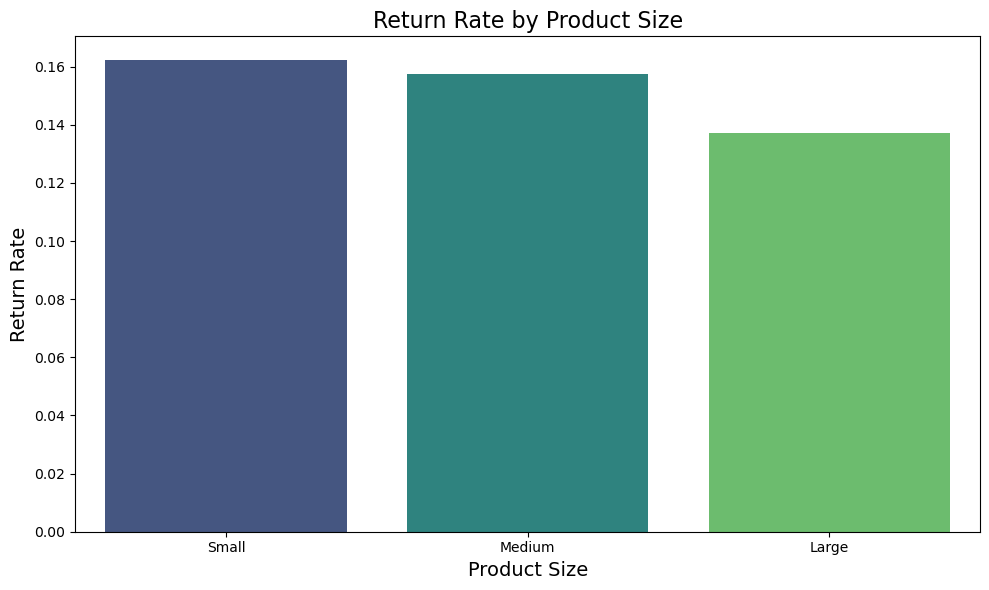

In [217]:
# EDA Visualization 07 - Return Rate by Delivery Time
size_return_rate = data.groupby('Product_Size')['Return_Status'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=size_return_rate.index, y=size_return_rate.values, palette='viridis', hue=size_return_rate.index)
plt.title('Return Rate by Product Size', fontsize=16)
plt.xlabel('Product Size', fontsize=14)
plt.ylabel('Return Rate', fontsize=14)
plt.tight_layout()
plt.show()

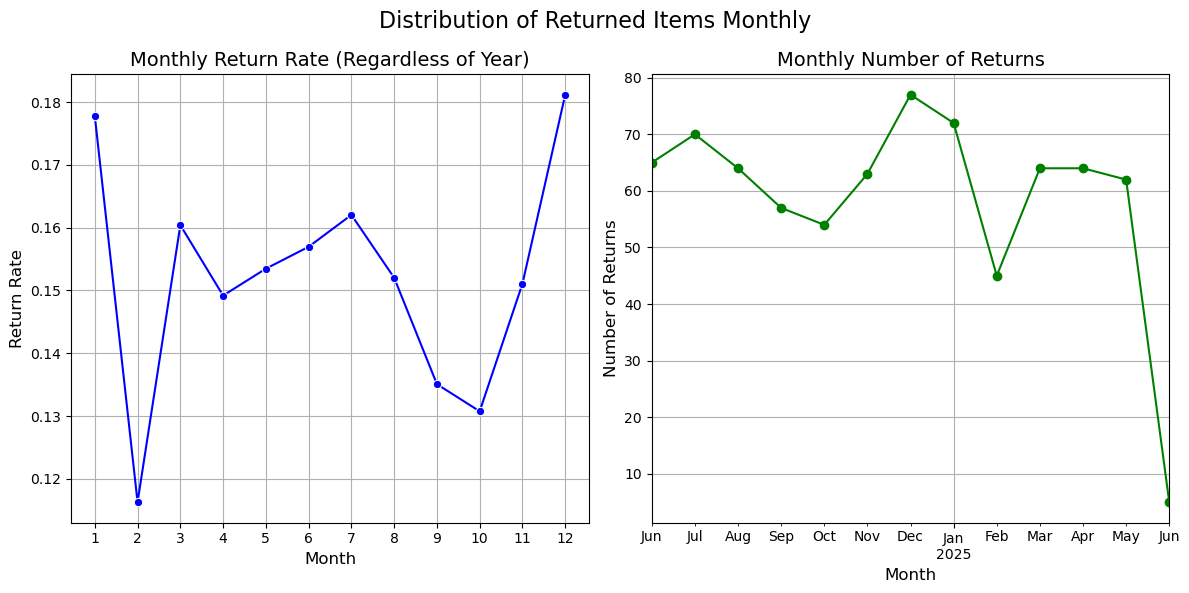

In [218]:
# EDA Visualization 08 - Return Rate by Order Date (Montlhy Basis)
plt.figure(figsize=(12, 6))
plt.suptitle('Distribution of Returned Items Monthly', fontsize=16)
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Month'] = data['Order_Date'].dt.month
data['Year'] = data['Order_Date'].dt.year

plt.subplot(1, 2, 1)
monthly_return_rate = data.groupby('Month')['Return_Status'].mean()
sns.lineplot(x=monthly_return_rate.index, y=monthly_return_rate.values, marker='o', color='blue') 
plt.title('Monthly Return Rate (Regardless of Year)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Return Rate', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)

plt.subplot(1, 2, 2)
data['Order_Month'] = data['Order_Date'].dt.to_period('M')
returns = data[data['Return_Status'] == 1]
monthly_returns = returns.groupby('Order_Month').size()
monthly_returns.plot(kind='line', marker='o', color='green')
plt.title('Monthly Number of Returns', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Returns', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

Bins: [0, 165.6, 331.2, 496.79999999999995, 662.4, 828.0]


/var/folders/xp/l_p7wd8n40s3lbcnjpqdqq680000gn/T/ipykernel_95038/2092394196.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_return_rate = data.groupby('Purchase_Bucket')['Return_Status'].mean().sort_values(ascending=False)


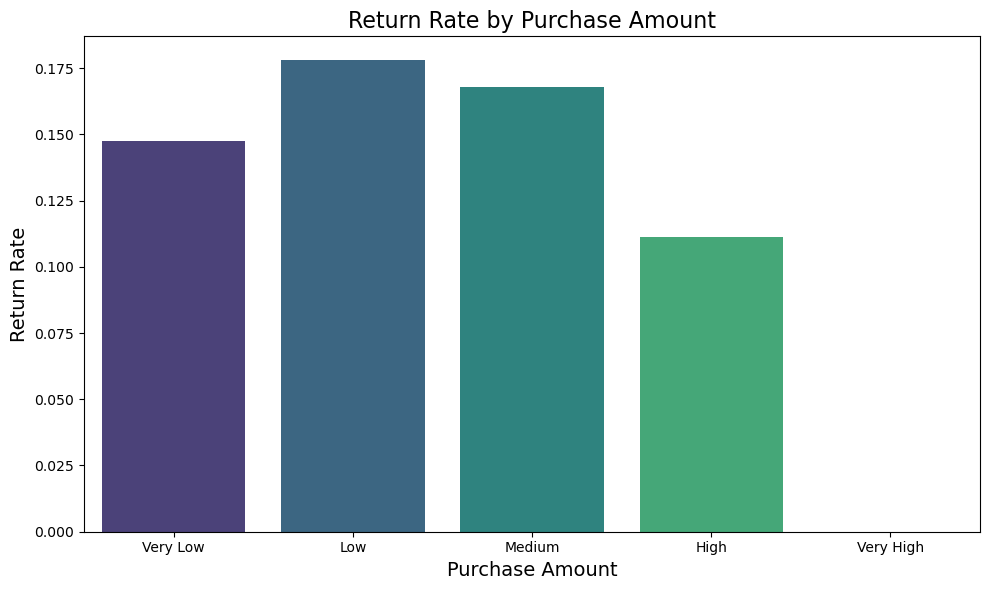

In [219]:
# EDA Visualization 09 - Return Rate by Purchase Amount (Bins)
max_value = math.ceil(data['Purchase_Amount'].max()+10)
#print(f"Max Purchase Amount: {max_value}")
bin_width = max_value / 5
bins=[0, bin_width, 2*bin_width, 3*bin_width, 4*bin_width, 5*bin_width]
print(f"Bins: {bins}")
data['Purchase_Bucket'] = pd.cut(
    data['Purchase_Amount'], 
    bins=bins, 
    labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'],
    include_lowest=True, # to include the leftmost edge since there are some values equal to 0 (2 in total)
    right=True # to include the rightmost edge
)
purchase_return_rate = data.groupby('Purchase_Bucket')['Return_Status'].mean().sort_values(ascending=False)
#print(purchase_return_rate)

plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_return_rate.index, y=purchase_return_rate.values, palette='viridis', hue=purchase_return_rate.index)
plt.title('Return Rate by Purchase Amount', fontsize=16)
plt.xlabel('Purchase Amount', fontsize=14)
plt.ylabel('Return Rate', fontsize=14)
plt.tight_layout()
plt.show()

In [220]:
print(data['Purchase_Bucket'].dtype)

category


In [221]:
# Analyze categorical columns
categorical_cols = data.select_dtypes(include=['object','category']).columns
print("\nCategorical columns:", list(categorical_cols))


Categorical columns: ['Product_Category', 'Shipping_Method', 'Product_Size', 'Purchase_Bucket']


In [222]:
# Analyze numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(numerical_cols))

Numerical columns: ['Purchase_Amount', 'Delivery_Time_Days', 'Customer_Review_Score', 'Discount_Applied', 'Return_Status']


In [223]:
# Encode categorical variables
data_encoded = data.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

In [224]:
# Convert date to numerical (days since earliest date)
if 'Order_Date' in data.columns:
    data_encoded['Order_Date'] = pd.to_datetime(data['Order_Date'])
    data_encoded['Days_Since_First_Order'] = (data_encoded['Order_Date'] - data_encoded['Order_Date'].min()).dt.days
    data_encoded.drop('Order_Date', axis=1, inplace=True)
    data_encoded.drop('Order_Month', axis=1, inplace=True)

In [225]:
# Correlation matrix
numeric_df = data_encoded.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

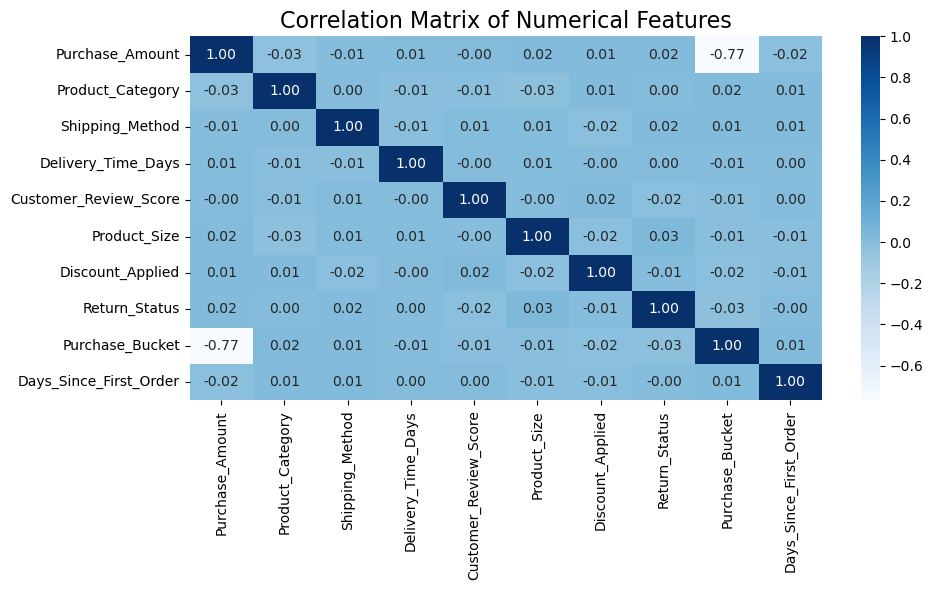

In [226]:
# EDA Visualization 09 - Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [227]:
# Feature importance using Random Forest
X = data_encoded.drop('Return_Status', axis=1)
y = data_encoded['Return_Status']

In [228]:
X.head()

,Purchase_Amount,Product_Category,Shipping_Method,Delivery_Time_Days,Customer_Review_Score,Product_Size,Discount_Applied,Month,Year,Purchase_Bucket,Days_Since_First_Order
0,46.9300,3,0,4,4.6000,2,0,12,2024,4,188
1,301.0100,3,2,5,2.6000,1,0,12,2024,1,207
2,131.6700,0,1,7,3.7000,2,1,4,2025,4,327
3,91.2900,3,0,6,3.8000,1,1,6,2024,4,25
4,16.9600,4,0,4,5.0000,0,0,6,2024,4,4


In [229]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Return_Status, dtype: int64

In [230]:
# Train a Random Forest model
randForest = RandomForestClassifier(n_estimators=100, random_state=42)
randForest.fit(X, y)

RandomForestClassifier(random_state=42)

In [235]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': randForest.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10).sort_values('Importance', ascending=False))

                   Feature  Importance
0          Purchase_Amount      0.2304
10  Days_Since_First_Order      0.2062
4    Customer_Review_Score      0.1491
3       Delivery_Time_Days      0.1128
1         Product_Category      0.0729
7                    Month      0.0721
2          Shipping_Method      0.0608
5             Product_Size      0.0437
6         Discount_Applied      0.0294
9          Purchase_Bucket      0.0141


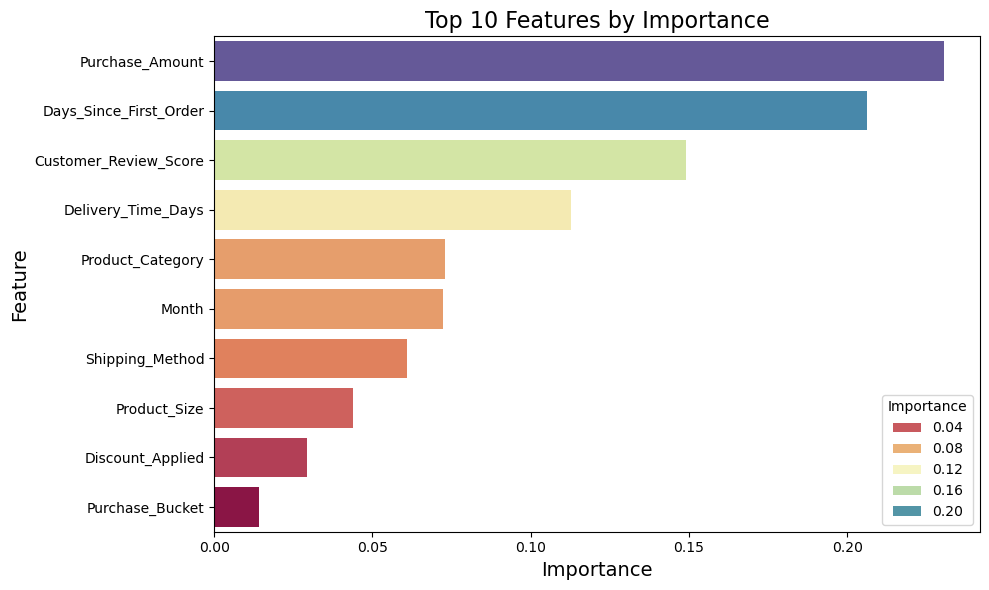

In [239]:
# EDA Visualization 10 - Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='Spectral',hue='Importance')
plt.title('Top 10 Features by Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()